# Exercício 1

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

seed = [1000,1001]

In [85]:
# 1
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
mean2 = [-3, -3]
cov2 = [[2, 0], [0, 5]]
# diagonal covariance
x, y = np.random.multivariate_normal(mean1, cov1, 5000).T
z, h = np.random.multivariate_normal(mean2, cov2, 5000).T

x = np.append(x, z)
y = np.append(y, h)
random.Random(50).shuffle(x)
random.Random(50).shuffle(y)

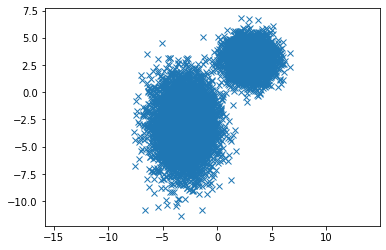

In [86]:
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

# Exercício 2

In [87]:
random.seed(seed[0])
r1_idx = random.randint(0, 4999 * 2)
random.seed(seed[1])
r2_idx = random.randint(0, 4999 * 2)
r1 = [x[r1_idx], y[r1_idx]]
r2 = [x[r2_idx], y[r2_idx]]


In [88]:
def distance_2_points(point_1, point_2):
    return math.sqrt(math.pow(point_2[0] - point_1[0], 2) + math.pow(point_2[1] - point_1[1], 2))

In [89]:
r1_x = []
r2_x = []
r1_y = []
r2_y = []
close_r1 = []
close_r2 = []
for j in range(10):

    for i in range(len(x)):

        alfa = 0.0010
        distance_to_r1 = distance_2_points(r1, [x[i], y[i]])
        distance_to_r2 = distance_2_points(r2, [x[i], y[i]])
        if distance_to_r1 < distance_to_r2:
            close_r1.append([x[i],y[i]])
            r1[0] = (1 - alfa) * r1[0] + alfa * x[i]
            r1[1] = (1 - alfa) * r1[1] + alfa * y[i]
        else:
            close_r2.append([x[i],y[i]])
            r2[0] = (1 - alfa) * r2[0] + alfa * x[i]
            r2[1] = (1 - alfa) * r2[1] + alfa * y[i]
        if j == 0:
            r1_x.append(r1[0])
            r1_y.append(r1[1])
            r2_x.append(r2[0])
            r2_y.append(r2[1])

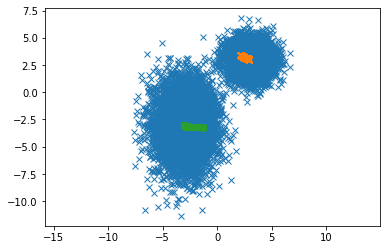

In [90]:
plt.plot(x, y, 'x')
plt.plot(r1_x, r1_y, 'x')
plt.plot(r2_x, r2_y, 'o')
plt.axis('equal')
plt.show()

In [91]:
diff_r1 = [0,0]
diff_r2 = [0,0]
old_r1 = np.array(r1).copy()
old_r2 = np.array(r2).copy()
for i in range(len(x)):
    alfa = 0.2
    diff_r1[0],diff_r1[1] = diff_r1[0] + (x[i] - r1[0]), diff_r1[1] + (y[i] - r1[1])
    diff_r2[0],diff_r2[1] = diff_r2[0] + (x[i] - r2[0]), diff_r2[1] + (y[i] - r2[1])
r1[0],r1[1] = r1[0] + (alfa/len(x)) * diff_r1[0],r1[1] + (alfa/len(x)) * diff_r1[1]
r2[0],r2[1] = r2[0] + (alfa/len(x)) * diff_r2[0],r2[1] + (alfa/len(x)) * diff_r2[1]


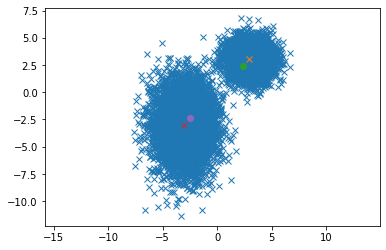

In [92]:
plt.plot(x, y, 'x')
plt.plot(old_r1[0], old_r1[1], 'x')
plt.plot(r1[0], r1[1], 'o')
plt.plot(old_r2[0], old_r2[1], 'x')
plt.plot(r2[0], r2[1], 'o')
plt.axis('equal')
plt.show()

# Exercício 3

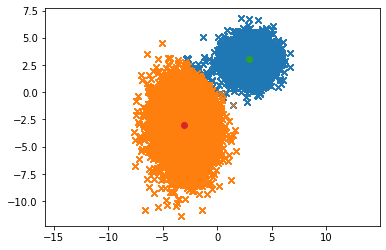

In [93]:
plt.plot(np.array(close_r1).T[0],np.array(close_r1).T[1],'x')
plt.plot(np.array(close_r2).T[0],np.array(close_r2).T[1],'x')
plt.plot(old_r1[0],old_r1[1],'o')
plt.plot(old_r2[0],old_r2[1],'o')
plt.axis('equal')
plt.show()

# Exercício 4

Não consegui terminar o exercício

In [100]:
x, y = np.random.multivariate_normal(mean1, cov1, 100).T
z, h = np.random.multivariate_normal(mean2, cov2, 100).T

x = np.append(x, z)
y = np.append(y, h)
random.Random(50).shuffle(x)
random.Random(50).shuffle(y)

closest_points = []
while len(x) > 2:
    for i in range(len(x)):
        for j in range(i+1,len(x)):
            dist = distance_2_points([x[i], y[i]], [x[j], y[j]])
            if dist == 0:
                pass
            else:
                if len(closest_points) == 0:
                    closest_points = [[x[i], y[i]], [x[j], y[j]], dist]
                else:
                    if closest_points[2] > dist:
                        closest_points = [[x[i], y[i]], [x[j], y[j]], dist]
    x = np.delete(x, np.where(x == closest_points[0][0]), 0)
    x = np.delete(x, np.where(x == closest_points[1][0]), 0)
    y = np.delete(y, np.where(y == closest_points[1][0]), 0)
    y = np.delete(y, np.where(y == closest_points[1][0]), 0)
    avg = [(closest_points[0][0] + closest_points[0][1]) / 2, (closest_points[1][0] + closest_points[1][1]) / 2]
    x = np.append(x, avg[0])
    y = np.append(y, avg[1])

plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()
            

KeyboardInterrupt: 

# Exercício 5

In [94]:
def points(matrix):
    aux_x = []
    aux_y = []
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            aux_x.append(matrix[i][j][0])
            aux_y.append(matrix[i][j][1])
    return aux_x,aux_y

def plot(x,y,x1,y1):
    plt.plot(x, y, 'x')
    plt.plot(x1,y1, 'x')
    plt.axis('equal')
    plt.show()

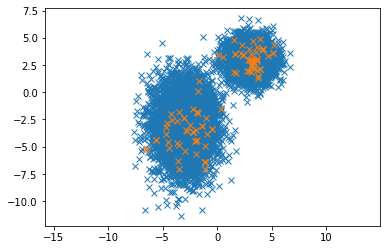

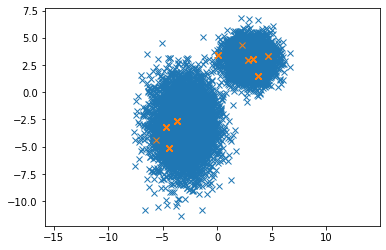

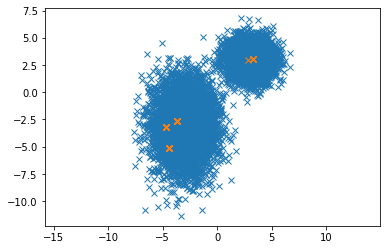

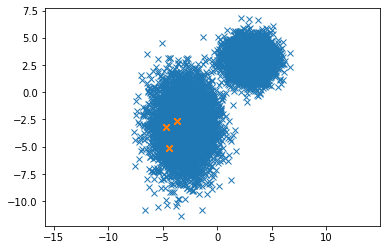

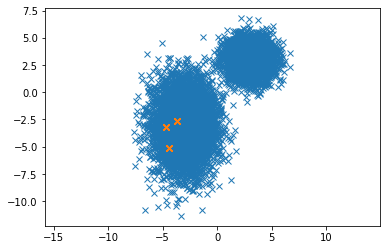

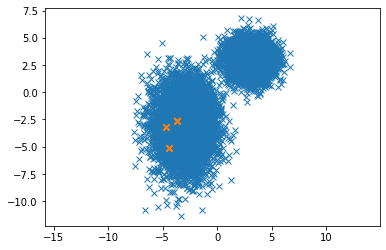

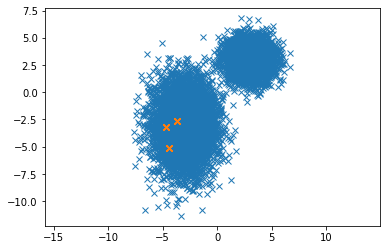

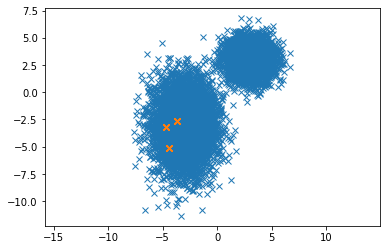

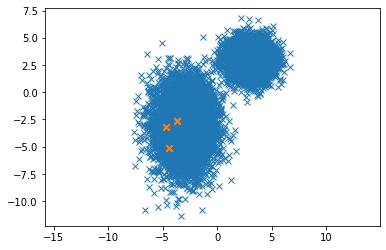

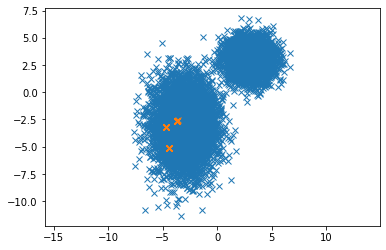

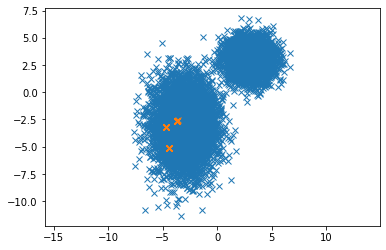

In [95]:
random.seed(seed[0])
matrix_len = random.randint(4,10)
matrix = []


for i in range(matrix_len):
    row = []
    for j in range(matrix_len):
        idx = random.randint(300, 600)
        row.append([x[idx],y[idx]])
    matrix.append(row)

arr_x,arr_y = points(matrix)
plot(x,y,arr_x,arr_y)

epoch = [1000,2000,3000,4000,5000,6000,7000,8000,9000]

for j in range(len(x)):
    
    if j in epoch:
        arr_x,arr_y = points(matrix)
        plot(x,y,arr_x,arr_y)
    
    alfa = 10E-6
    dist = []
    for k in range(len(matrix)):
        for v in range(len(matrix[k])):
            dist.append([distance_2_points([matrix[k][v][0],matrix[k][v][1]],[x[j], y[j]]),[k,v]])
    dist.sort(key=lambda tup: tup[0])
    row = dist[0][1][0]
    col = dist[0][1][1]
    matrix[row][col][0] = (1 - alfa) * matrix[row][col][0] + alfa * x[j]
    matrix[row][col][1] = (1 - alfa) * matrix[row][col][1] + alfa * y[j]
    # r = (1 - alfa/2) r + (alfa/2) * x
    if row+1 == matrix_len:
        matrix[row-1][col][0] = (1-alfa/2)*matrix[row-1][col][0] + (alfa/2) * x[j]
        matrix[row-1][col][1] = (1-alfa/2)*matrix[row-1][col][1] + (alfa/2) * y[j]
    elif row == 0:
        matrix[row+1][col][0] = (1-alfa/2)*matrix[row-1][col][0] + (alfa/2) * x[j]
        matrix[row+1][col][1] = (1-alfa/2)*matrix[row-1][col][1] + (alfa/2) * y[j]
    else:
        matrix[row-1][col][0] = (1-alfa/2)*matrix[row-1][col][0] + (alfa/2) * x[j]
        matrix[row-1][col][1] = (1-alfa/2)*matrix[row-1][col][1] + (alfa/2) * y[j]
        matrix[row+1][col][0] = (1-alfa/2)*matrix[row-1][col][0] + (alfa/2) * x[j]
        matrix[row+1][col][1] = (1-alfa/2)*matrix[row-1][col][1] + (alfa/2) * y[j]
    if col+1 == matrix_len:
        matrix[row][col-1][0] = (1-alfa/2)*matrix[row-1][col][0] + (alfa/2) * x[j]
        matrix[row][col-1][1] = (1-alfa/2)*matrix[row-1][col][1] + (alfa/2) * y[j]
    elif col == 0:
        matrix[row][col+1][0] = (1-alfa/2)*matrix[row-1][col][0] + (alfa/2) * x[j]
        matrix[row][col+1][1] = (1-alfa/2)*matrix[row-1][col][1] + (alfa/2) * y[j]
    else:
        matrix[row][col-1][0] = (1-alfa/2)*matrix[row-1][col][0] + (alfa/2) * x[j]
        matrix[row][col-1][1] = (1-alfa/2)*matrix[row-1][col][1] + (alfa/2) * y[j]
        matrix[row][col+1][0] = (1-alfa/2)*matrix[row-1][col][0] + (alfa/2) * x[j]
        matrix[row][col+1][1] = (1-alfa/2)*matrix[row-1][col][1] + (alfa/2) * y[j]

arr_x,arr_y = points(matrix)
plot(x,y,arr_x,arr_y)

# Exercício 6

In [96]:
def core_point(eps, min_n, xp, yp):
    found = False
    stagnate = 0
    if len(xp) == 0:
        return 0
    while not found and stagnate < 1000:
        core_idx = random.randint(0, len(xp) - 1)
        core = [xp[core_idx], yp[core_idx]]
        core_n = []
        for i in range(len(xp)):
            if i != core_idx:
                dist = distance_2_points(core, [xp[i], yp[i]])
                if dist <= eps:
                    core_n.append([xp[i], yp[i]])
        if len(core_n) >= min_n:
            found = True
        stagnate += 1
    core_n.append(core)
    if len(core_n) == 0:
        return 0
    else:
        return core, core_n


def expand_cluster(eps, xp, yp, n):
    cluster = n
    end = False
    while not end:
        found = False
        for i in range(len(cluster)):
            for j in range(len(xp)):
                if [cluster[i][0], cluster[i][1]] == [xp[j], yp[j]]:
                    continue
                else:
                    dist = distance_2_points([cluster[i][0], cluster[i][1]], [xp[j], yp[j]])

                    if dist <= eps:
                        if [xp[j], yp[j]] not in cluster:
                            found = True
                            cluster.append([xp[j], yp[j]])

        if not found:
            end = True
    for k in range(len(cluster)):
        xp = np.delete(xp, np.where(xp == cluster[k][0]), 0)
        yp = np.delete(yp, np.where(yp == cluster[k][1]), 0)
    return cluster, xp, yp


def predict(eps, min_n, px, py):
    x_p = px
    y_p = py
    clusters = []
    end = False
    while not end:
        core_p_n = core_point(eps, min_n, x_p, y_p)
        if core_p_n == 0:
            end = True
        else:
            cluster = expand_cluster(eps, x_p, y_p, core_p_n[1])
            clusters.append(cluster[0])
            x_p = cluster[1]
            y_p = cluster[2]

    for i in clusters:
        plot(i)
    plt.axis('equal')
    plt.show()


def plot(cluster):

    arr_x = np.array(cluster).T[0]
    arr_y = np.array(cluster).T[1]
    plt.plot(arr_x, arr_y, 'x')
            
    

Para 2000 pontos, devido ao tempo de execução dos 10000 iniciais.

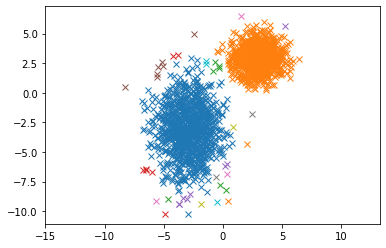

In [97]:
# diagonal covariance
x, y = np.random.multivariate_normal(mean1, cov1, 1000).T
z, h = np.random.multivariate_normal(mean2, cov2, 1000).T

x = np.append(x, z)
y = np.append(y, h)
random.Random(50).shuffle(x)
random.Random(50).shuffle(y)

predict(0.7, 3, x, y)